In [5]:
from networkx import read_graphml
import numpy as np

In [6]:
# Carico il grafo dal file fornito
graph_path = '../Results/multilayer.graphml'
graph = read_graphml(graph_path)
# Verifico le informazioni di base sul grafo: numero di nodi, di archi e se il grafo è diretto o meno
info = {
    "number_of_nodes": graph.number_of_nodes(),
    "number_of_edges": graph.number_of_edges(),
    "is_directed": graph.is_directed()
}
info

{'number_of_nodes': 11029, 'number_of_edges': 144431, 'is_directed': False}

In [7]:


# Calcolo la distribuzione dei gradi dei nodi
degrees = [degree for node, degree in graph.degree()]

# Calcolo alcune metriche di base sulla distribuzione dei gradi
average_degree = np.mean(degrees)
max_degree = np.max(degrees)
min_degree = np.min(degrees)
median_degree = np.median(degrees)

# Per avere un'idea della distribuzione, calcoliamo anche il 95° percentile
percentile_95 = np.percentile(degrees, 95)

{
    "average_degree": average_degree,
    "max_degree": max_degree,
    "min_degree": min_degree,
    "median_degree": median_degree,
    "percentile_95": percentile_95
}

{'average_degree': 26.191132468945508,
 'max_degree': 1583,
 'min_degree': 1,
 'median_degree': 5.0,
 'percentile_95': 125.0}

* Grado medio dei nodi: Circa 26.19, indicando il numero medio di collegamenti per nodo.
* Grado massimo: Un nodo ha un grado massimo di 1583, suggerendo la presenza di un nodo altamente connesso (o più di uno) che potrebbe fungere da hub all'interno del network.
* Grado minimo: Il grado minimo è 1, il che indica che ci sono nodi con un solo collegamento.
* Mediana del grado: 5, suggerendo che la metà dei nodi ha 5 o meno collegamenti, il che evidenzia una distribuzione dei gradi piuttosto eterogenea.
* 95° percentile: 125, indicando che il 95% dei nodi ha 125 collegamenti o meno, mentre ci sono nodi con un numero di collegamenti molto più alto, riflettendo una possibile struttura di rete scale-free.

In [11]:
interlayer_edges = [(u, v, d) for u, v, d in graph.edges(data=True) if 'interlayer' in d.values()]

num_interlayer_edges_updated = len(interlayer_edges)

interlayer_nodes_updated = set([node for edge in interlayer_edges for node in edge[:2]])

num_interlayer_nodes_updated = len(interlayer_nodes_updated)

total_nodes = graph.number_of_nodes()

{
    "number_of_interlayer_edges_updated": num_interlayer_edges_updated,
    "number_of_interlayer_nodes_updated": num_interlayer_nodes_updated,
    "all_nodes_have_interlayer_updated": num_interlayer_nodes_updated == total_nodes
}

{'number_of_interlayer_edges_updated': 329,
 'number_of_interlayer_nodes_updated': 637,
 'all_nodes_have_interlayer_updated': False}

In [9]:
# Calcolo la distribuzione dei gradi per i nodi coinvolti negli archi interlayer
interlayer_degrees = [graph.degree(node) for node in interlayer_nodes_updated]

# Calcolo alcune statistiche di base su questa distribuzione dei gradi
average_degree_interlayer = np.mean(interlayer_degrees)
max_degree_interlayer = np.max(interlayer_degrees)
min_degree_interlayer = np.min(interlayer_degrees)
median_degree_interlayer = np.median(interlayer_degrees)

# Per avere un'idea più precisa della distribuzione, calcoliamo anche il 95° percentile
percentile_95_interlayer = np.percentile(interlayer_degrees, 95)

{
    "average_degree_interlayer": average_degree_interlayer,
    "max_degree_interlayer": max_degree_interlayer,
    "min_degree_interlayer": min_degree_interlayer,
    "median_degree_interlayer": median_degree_interlayer,
    "percentile_95_interlayer": percentile_95_interlayer
}


{'average_degree_interlayer': 20.459968602825747,
 'max_degree_interlayer': 1583,
 'min_degree_interlayer': 2,
 'median_degree_interlayer': 4.0,
 'percentile_95_interlayer': 102.19999999999959}

* Grado medio: Circa 20.46, indicando il numero medio di collegamenti per questi nodi. Questo è leggermente inferiore al grado medio dell'intero grafo, suggerendo una diversa integrazione di questi nodi nella rete.
* Grado massimo: 1583, confermando la presenza di nodi altamente connessi anche tra quelli coinvolti negli archi interlayer.
* Grado minimo: 2, mostrando che ogni nodo coinvolto in archi interlayer ha almeno un altro collegamento oltre all'arco interlayer.
* Mediana del grado: 4, che indica che la metà di questi nodi ha 4 o meno collegamenti. Questo è leggermente inferiore alla mediana dell'intero grafo, riflettendo una distribuzione eterogenea dei gradi anche in questo sottoinsieme di nodi.
* 95° percentile: 102.2, indicando che il 95% di questi nodi ha 102 collegamenti o meno. Questo evidenzia la presenza di alcuni nodi estremamente connessi, ma la maggior parte ha un numero di collegamenti relativamente basso.

In [13]:
from networkx import number_connected_components, connected_components

# Calcolo la dimensione della componente connessa più grande (GCC) nel grafo originale
gcc_size_original = max(len(c) for c in connected_components(graph))

# Calcolo il numero totale di componenti connesse nel grafo originale
num_components_original = number_connected_components(graph)

{
    "gcc_size_original": gcc_size_original,
    "num_components_original": num_components_original
}


{'gcc_size_original': 9777, 'num_components_original': 399}

In [14]:
# Rimuovo temporaneamente gli archi interlayer dal grafo
graph_without_interlayer = graph.copy()
graph_without_interlayer.remove_edges_from(interlayer_edges)

# Calcolo la dimensione della GCC e il numero di componenti connesse nel grafo senza gli archi interlayer
gcc_size_without_interlayer = max(len(c) for c in connected_components(graph_without_interlayer))
num_components_without_interlayer = number_connected_components(graph_without_interlayer)

{
    "gcc_size_without_interlayer": gcc_size_without_interlayer,
    "num_components_without_interlayer": num_components_without_interlayer
}


{'gcc_size_without_interlayer': 5349, 'num_components_without_interlayer': 468}

### Rimuovendo temporaneamente gli archi interlayer dal grafo, osserviamo i seguenti cambiamenti:

* Dimensione della GCC: Ridotta a 5,349 nodi, rispetto ai 9,777 nodi con gli archi interlayer presenti. Questo indica una significativa diminuzione della componente connessa più grande, suggerendo che gli archi interlayer giocano un ruolo cruciale nel collegare diverse parti del grafo.
* Numero di componenti connesse: Aumentato a 468, da 399. Questo aumento indica che la rimozione degli archi interlayer porta alla frammentazione della rete in un numero maggiore di componenti isolate.

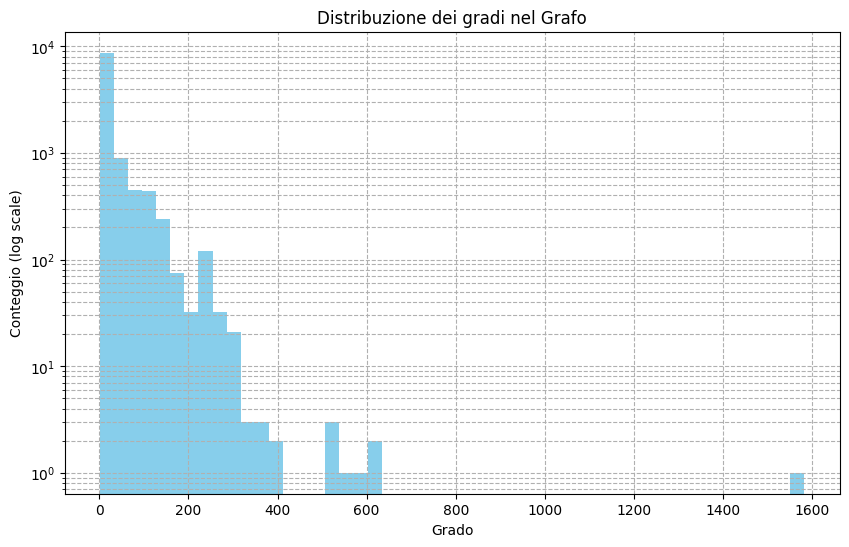

In [15]:
import matplotlib.pyplot as plt

# Creo un istogramma della distribuzione dei gradi
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='skyblue', log=True)  # Uso scala logaritmica per l'asse y per gestire meglio la distribuzione
plt.title('Distribuzione dei gradi nel Grafo')
plt.xlabel('Grado')
plt.ylabel('Conteggio (log scale)')
plt.grid(True, which="both", ls="--")
plt.show()

La visualizzazione della distribuzione dei gradi nel grafo mostra come la maggior parte dei nodi abbia un numero relativamente basso di collegamenti, ma esiste anche una coda lunga di nodi con un numero elevato di collegamenti. Questa è una caratteristica comune nelle reti che seguono una distribuzione in legge di potenza, tipica delle reti scale-free, dove pochi nodi (gli hub) hanno molti collegamenti, mentre la maggior parte dei nodi ne ha pochi.

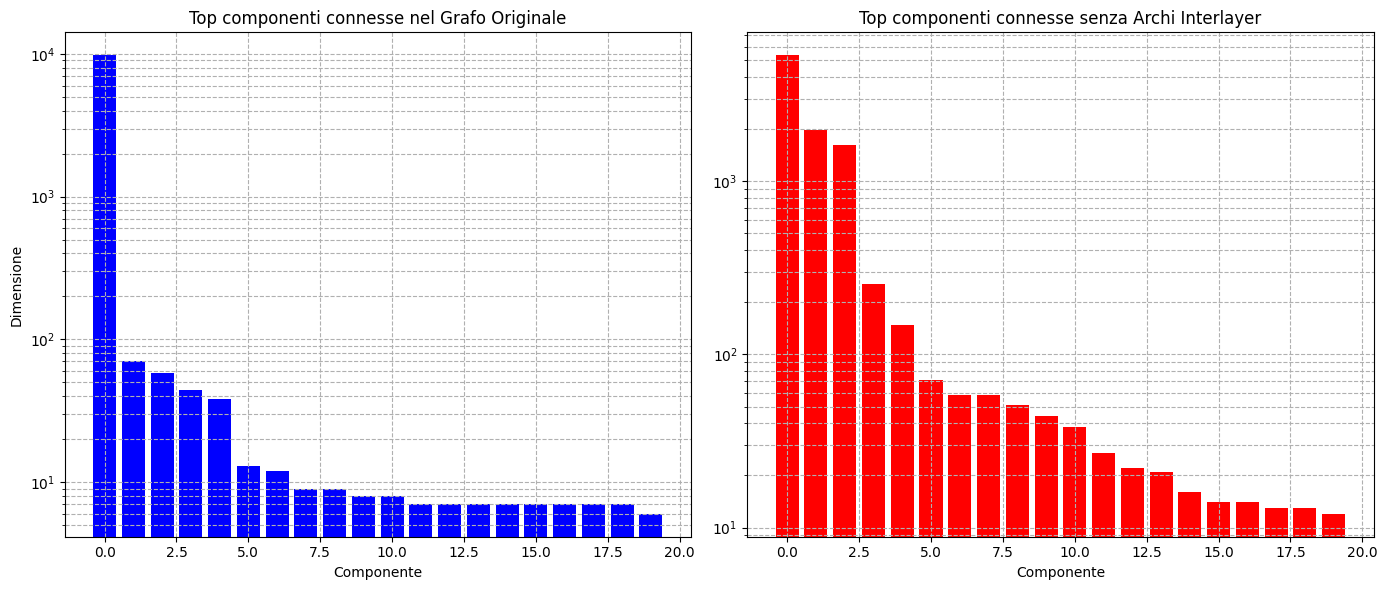

In [16]:
# Calcolo le dimensioni delle componenti connesse per il grafo originale e quello senza archi interlayer
sizes_original = sorted([len(c) for c in connected_components(graph)], reverse=True)
sizes_without_interlayer = sorted([len(c) for c in connected_components(graph_without_interlayer)], reverse=True)

# Limito il numero di componenti da visualizzare per mantenere il grafico leggibile
top_n_components = 20

plt.figure(figsize=(14, 6))

# Grafico per le dimensioni delle componenti nel grafo originale
plt.subplot(1, 2, 1)
plt.bar(range(min(top_n_components, len(sizes_original))), sizes_original[:top_n_components], color='blue')
plt.title('Top componenti connesse nel Grafo Originale')
plt.xlabel('Componente')
plt.ylabel('Dimensione')
plt.yscale('log')
plt.grid(True, which="both", ls="--")

# Grafico per le dimensioni delle componenti nel grafo senza archi interlayer
plt.subplot(1, 2, 2)
plt.bar(range(min(top_n_components, len(sizes_without_interlayer))), sizes_without_interlayer[:top_n_components], color='red')
plt.title('Top componenti connesse senza Archi Interlayer')
plt.xlabel('Componente')
plt.yscale('log')
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()


I grafici mostrano le dimensioni delle top componenti connesse sia nel grafo originale sia nel grafo senza archi interlayer. È evidente l'impatto significativo degli archi interlayer sulla coesione del grafo: la dimensione della componente connessa più grande si riduce drasticamente senza questi collegamenti

In [32]:
graph_expression = read_graphml('../R/sottografo_expression.graphml')
graph_methylation = read_graphml('../R/sottografo_methylation.graphml')
graph_mutation = read_graphml('../R/sottografo_mutation.graphml')

10707


In [44]:
top_10_nodes_expression = sorted(graph_expression.degree(), key=lambda x: x[1], reverse=True)[:10]

for node, degree in top_10_nodes_expression:
    print(f"Node: {graph_expression.nodes[node]}, Degree: {degree}")

Node: {'name': 'LINC00290'}, Degree: 361
Node: {'name': 'RNY4P30'}, Degree: 357
Node: {'name': 'AC068733.2'}, Degree: 323
Node: {'name': 'AL353778.1'}, Degree: 315
Node: {'name': 'AC091163.3'}, Degree: 314
Node: {'name': 'AP001836.1'}, Degree: 311
Node: {'name': 'AC004470.1'}, Degree: 310
Node: {'name': 'MTND4P17'}, Degree: 310
Node: {'name': 'AC073065.2'}, Degree: 304
Node: {'name': 'PRAMEF6'}, Degree: 303


In [45]:
top_10_nodes_methylation = sorted(graph_methylation.degree(), key=lambda x: x[1], reverse=True)[:10]

for node, degree in top_10_nodes_methylation:
    print(f"Node: {graph_methylation.nodes[node]}, Degree: {degree}")

Node: {'name': 'RP11-416K24.1'}, Degree: 619
Node: {'name': 'CLEC4F'}, Degree: 286
Node: {'name': 'C17orf80'}, Degree: 279
Node: {'name': 'TAAR3'}, Degree: 277
Node: {'name': 'BTN3A1'}, Degree: 276
Node: {'name': 'AIM2'}, Degree: 273
Node: {'name': 'KCTD16'}, Degree: 266
Node: {'name': 'PAMR1'}, Degree: 266
Node: {'name': 'PTPRZ1'}, Degree: 265
Node: {'name': 'TDRD12'}, Degree: 260


In [46]:
top_10_nodes_mutation = sorted(graph_mutation.degree(), key=lambda x: x[1], reverse=True)[:10]

for node, degree in top_10_nodes_mutation:
    print(f"Node: {graph_mutation.nodes[node]}, Degree: {degree}")

Node: {'name': 'TTN'}, Degree: 1582
Node: {'name': 'OBSCN'}, Degree: 621
Node: {'name': 'MUC16'}, Degree: 602
Node: {'name': 'DOCK3'}, Degree: 547
Node: {'name': 'SYNE1'}, Degree: 530
Node: {'name': 'DST'}, Degree: 529
Node: {'name': 'APC'}, Degree: 527
Node: {'name': 'RNF43'}, Degree: 407
Node: {'name': 'RYR3'}, Degree: 403
Node: {'name': 'RYR1'}, Degree: 355
